Detección automática de carcinoma ductal invasivo de cáncer de mama en imágenes de tejidos
de histopatología

Para el siguiente proyecto, realizaremos un modelo de aprendizaje automatico utilizando dos distintas arquitecturas de redes neuronales convolucionales (CNN) para la detección de carcinoma ductal invasivo de cáncer de mama en imágenes de tejidos de histopatología.

Para ello, utilizaremos el dataset Breast Cancer Histology Image Dataset. A continuacion veremos la distribucion de los datos en el dataset y la arquitectura de las redes neuronales convolucionales que utilizaremos para la detección de carcinoma ductal invasivo de cáncer de mama en imágenes de tejidos de histopatología.

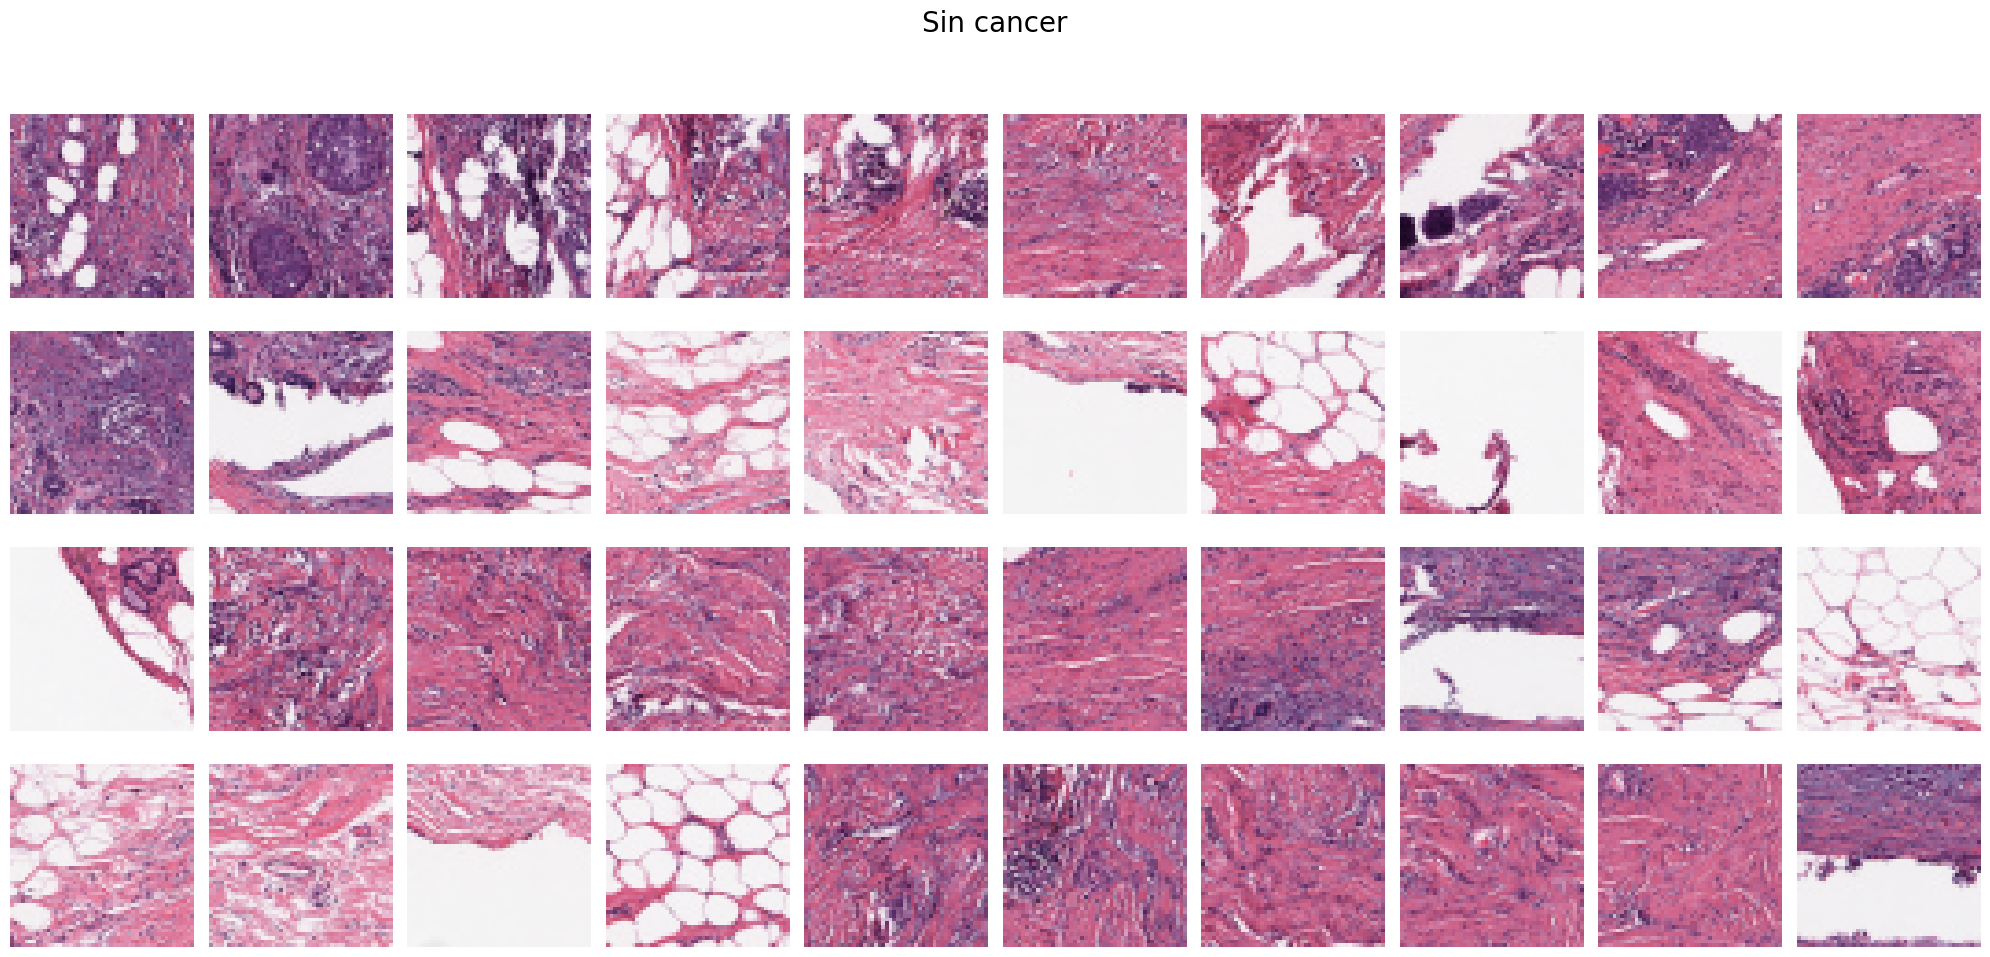

In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_folder = "dataset/8863/0"

image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.png')] 

fig, axes = plt.subplots(4, 10, figsize=(20, 10))
fig.suptitle('Sin cancer', fontsize=20)

for i in range(4):
    for j in range(10):        
        image_path = image_paths[j + 10 * i] 
        image = imread(image_path) 
        axes[i, j].imshow(image)
        axes[i, j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

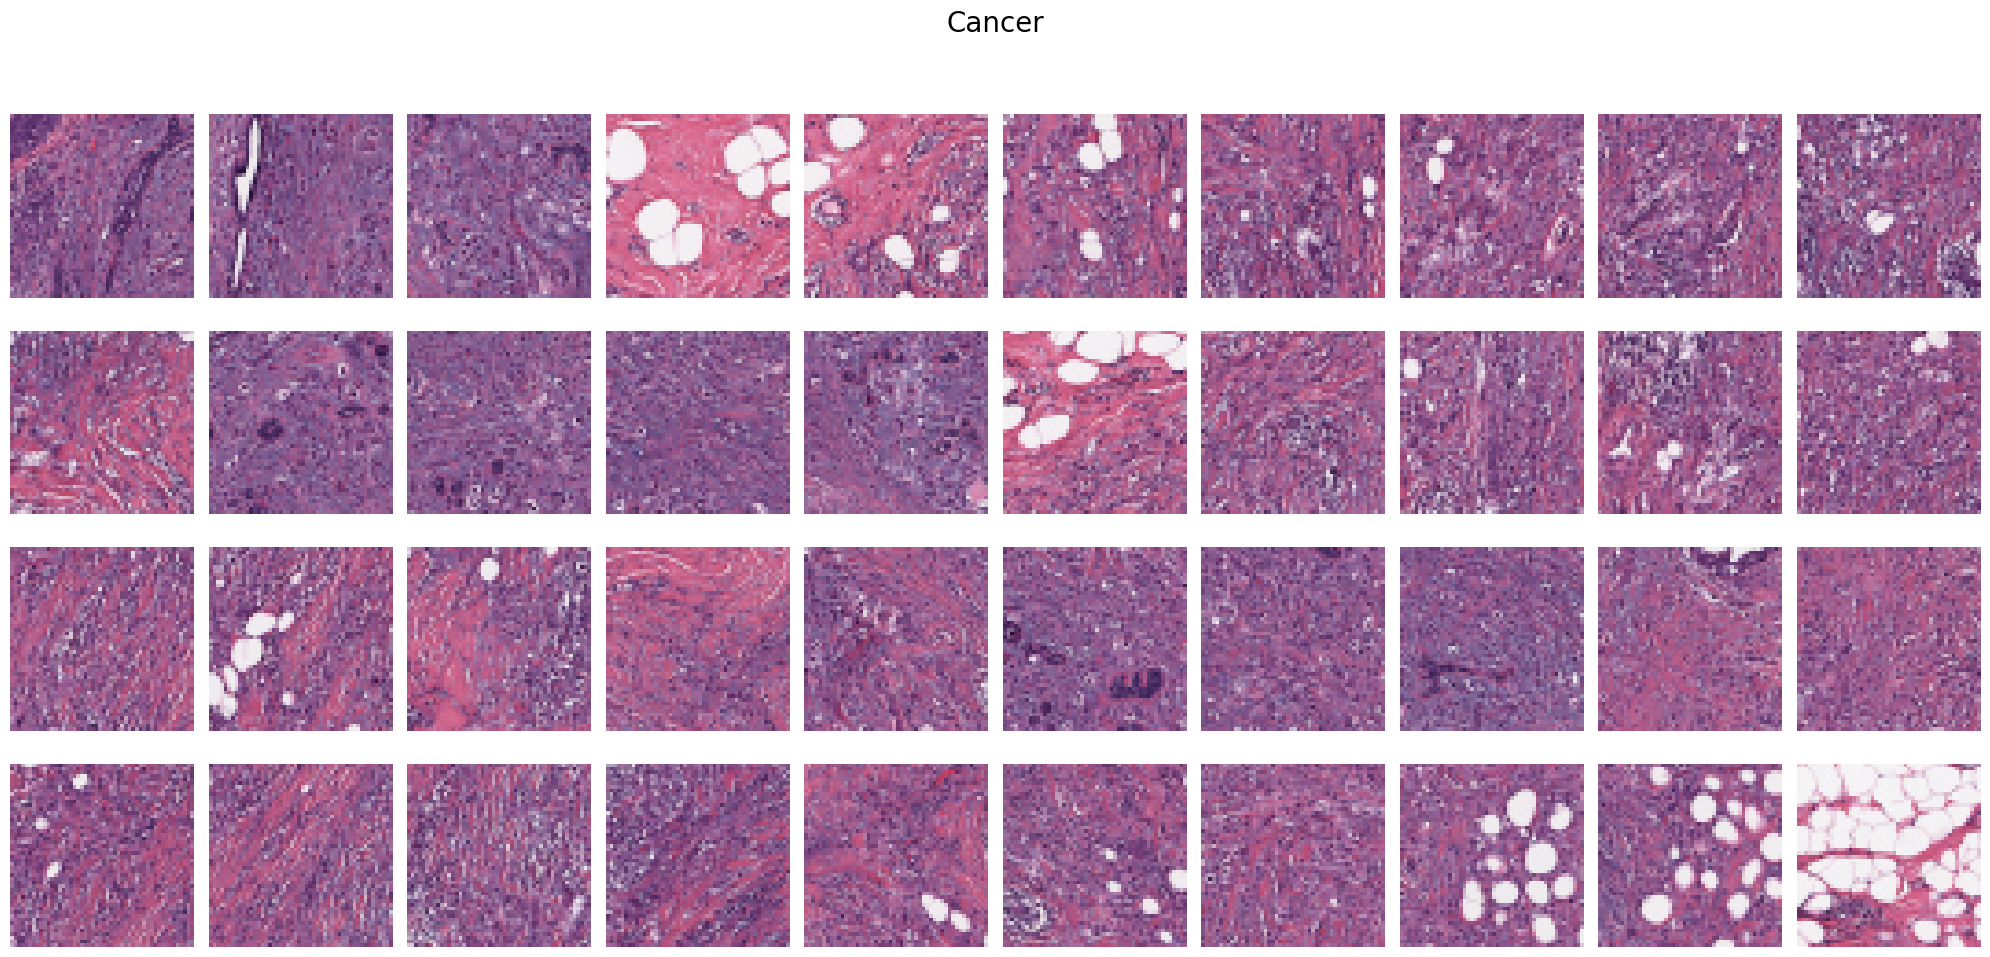

In [3]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_folder = "dataset/8863/1"

image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.png')] 

fig, axes = plt.subplots(4, 10, figsize=(20, 10))
fig.suptitle('Cancer', fontsize=20)

for i in range(4):
    for j in range(10):        
        image_path = image_paths[j + 10 * i] 
        image = imread(image_path) 
        axes[i, j].imshow(image)
        axes[i, j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

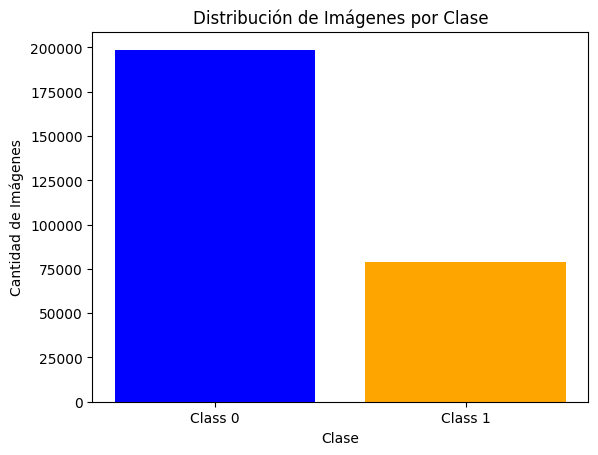

class 0:  198738
class 1:  78786


In [4]:
import os
import matplotlib.pyplot as plt

main_folder = 'dataset'

class_0_count = 0
class_1_count = 0

for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    
    if os.path.isdir(folder_path):
        class_0_folder = os.path.join(folder_path, '0')
        if os.path.isdir(class_0_folder):
            class_0_count += len([f for f in os.listdir(class_0_folder) if os.path.isfile(os.path.join(class_0_folder, f))])
        
        class_1_folder = os.path.join(folder_path, '1')
        if os.path.isdir(class_1_folder):
            class_1_count += len([f for f in os.listdir(class_1_folder) if os.path.isfile(os.path.join(class_1_folder, f))])

labels = ['Class 0', 'Class 1']
counts = [class_0_count, class_1_count]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Distribución de Imágenes por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Imágenes')
plt.show()
print("class 0: ", class_0_count)
print("class 1: ", class_1_count)

Haciendo una revision de las imagenes del dataset, se encontro algunas imagenes que no correspondian con las dimensiones 50x50 como las demas imagenes. Debido a este problema, se realizo un recorrido por cada carpeta verificando que todas las imagenes cumplan con esta regla

In [6]:
import os
from PIL import Image

folder_path = 'dataset'

valid_sizes = [(50, 50)]

def check_image():
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            
        if (width, height) not in valid_sizes:
            print(f'Imagen {filename} eliminada. Tamaño: ({width}, {height})')
            os.remove(image_path)
    except Exception as e:
        print(f'Error al abrir la imagen {filename}: {e}')


for filename in os.listdir(folder_path):
    subfolder = os.path.join(folder_path, filename)

    if os.path.isdir(subfolder):
        class_path_0 = os.path.join(subfolder, '0')
        class_path_1 = os.path.join(subfolder, '1')
        for image_path in os.listdir(class_path_0):
            image_path = os.path.join(class_path_0, image_path)
            check_image()
        for image_path in os.listdir(class_path_1):
            image_path = os.path.join(class_path_1, image_path)
            check_image()     

Imagen 10264 eliminada. Tamaño: (41, 50)
Imagen 10264 eliminada. Tamaño: (41, 50)
Imagen 10269 eliminada. Tamaño: (50, 37)
Imagen 10269 eliminada. Tamaño: (50, 37)
Imagen 10269 eliminada. Tamaño: (50, 37)
Imagen 10269 eliminada. Tamaño: (50, 37)
Imagen 10269 eliminada. Tamaño: (50, 37)
Imagen 10269 eliminada. Tamaño: (50, 37)
Imagen 10269 eliminada. Tamaño: (50, 37)
Imagen 10269 eliminada. Tamaño: (50, 37)
Imagen 10269 eliminada. Tamaño: (50, 37)
Imagen 10269 eliminada. Tamaño: (50, 37)
Imagen 10269 eliminada. Tamaño: (50, 37)
Imagen 10273 eliminada. Tamaño: (50, 3)
Imagen 10273 eliminada. Tamaño: (50, 3)
Imagen 10273 eliminada. Tamaño: (50, 3)
Imagen 10273 eliminada. Tamaño: (50, 3)
Imagen 10273 eliminada. Tamaño: (50, 3)
Imagen 10273 eliminada. Tamaño: (50, 3)
Imagen 10273 eliminada. Tamaño: (50, 3)
Imagen 10273 eliminada. Tamaño: (50, 3)
Imagen 10273 eliminada. Tamaño: (50, 3)
Imagen 10273 eliminada. Tamaño: (50, 3)
Imagen 10273 eliminada. Tamaño: (50, 3)
Imagen 10273 eliminada. Tam

Una vez eliminado esos datos que no sirvieron, asi quedo la distribucion de datos

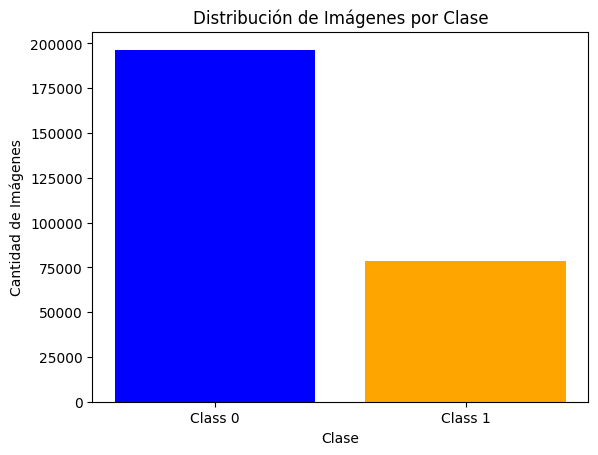

class 0:  196454
class 1:  78768


In [7]:
import os
import matplotlib.pyplot as plt

main_folder = 'dataset'

class_0_count = 0
class_1_count = 0

for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    
    if os.path.isdir(folder_path):
        class_0_folder = os.path.join(folder_path, '0')
        if os.path.isdir(class_0_folder):
            class_0_count += len([f for f in os.listdir(class_0_folder) if os.path.isfile(os.path.join(class_0_folder, f))])
        
        class_1_folder = os.path.join(folder_path, '1')
        if os.path.isdir(class_1_folder):
            class_1_count += len([f for f in os.listdir(class_1_folder) if os.path.isfile(os.path.join(class_1_folder, f))])

labels = ['Class 0', 'Class 1']
counts = [class_0_count, class_1_count]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Distribución de Imágenes por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Imágenes')
plt.show()
print("class 0: ", class_0_count)
print("class 1: ", class_1_count)

Tomaremos 100 carpetas para entrenamiento y 50 para prueba

In [8]:
import os
import shutil
import random

dataset_dir = "dataset"

train_dir = "dataset_train"
test_dir = "dataset_test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

folders = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]

random.shuffle(folders)

train_folders = folders[:100]
test_folders = folders[100:150]

for folder in train_folders:
    folder_path = os.path.join(dataset_dir, folder)
    target_folder = os.path.join(train_dir, folder)
    print(f"Copying {folder_path} to {target_folder}")
    class_0_folder = os.path.join(folder_path, '0')
    class_1_folder = os.path.join(folder_path, '1')
    class_0_images = [img for img in os.listdir(class_0_folder)]
    class_1_images = [img for img in os.listdir(class_1_folder)]
    os.makedirs(os.path.join(target_folder, '0'), exist_ok=True)
    os.makedirs(os.path.join(target_folder, '1'), exist_ok=True)
    for img in class_0_images:
        shutil.copy(os.path.join(class_0_folder, img), os.path.join(target_folder, '0', img))
    for img in class_1_images:
        shutil.copy(os.path.join(class_1_folder, img), os.path.join(target_folder, '1', img))
    
for folder in test_folders:
    folder_path = os.path.join(dataset_dir, folder)
    target_folder = os.path.join(test_dir, folder)
    print(f"Copying {folder_path} to {target_folder}")
    class_0_folder = os.path.join(folder_path, '0')
    class_1_folder = os.path.join(folder_path, '1')
    class_0_images = [img for img in os.listdir(class_0_folder)]
    class_1_images = [img for img in os.listdir(class_1_folder)]
    os.makedirs(os.path.join(target_folder, '0'), exist_ok=True)
    os.makedirs(os.path.join(target_folder, '1'), exist_ok=True)
    for img in class_0_images:
        shutil.copy(os.path.join(class_0_folder, img), os.path.join(target_folder, '0', img))
    for img in class_1_images:
        shutil.copy(os.path.join(class_1_folder, img), os.path.join(target_folder, '1', img))

print("Conjunto de datos dividido y balanceado en entrenamiento y prueba.")

Copying dataset\14192 to dataset_train\14192
Copying dataset\12929 to dataset_train\12929
Copying dataset\13025 to dataset_train\13025
Copying dataset\10259 to dataset_train\10259
Copying dataset\10269 to dataset_train\10269
Copying dataset\8980 to dataset_train\8980
Copying dataset\10293 to dataset_train\10293
Copying dataset\9255 to dataset_train\9255
Copying dataset\15632 to dataset_train\15632
Copying dataset\9181 to dataset_train\9181
Copying dataset\12884 to dataset_train\12884
Copying dataset\16569 to dataset_train\16569
Copying dataset\12930 to dataset_train\12930
Copying dataset\10288 to dataset_train\10288
Copying dataset\10303 to dataset_train\10303
Copying dataset\13617 to dataset_train\13617
Copying dataset\10286 to dataset_train\10286
Copying dataset\8951 to dataset_train\8951
Copying dataset\12909 to dataset_train\12909
Copying dataset\13691 to dataset_train\13691
Copying dataset\12934 to dataset_train\12934
Copying dataset\15839 to dataset_train\15839
Copying dataset\12

Asi quedo la distribucion de datos de prueba y entrenamiento

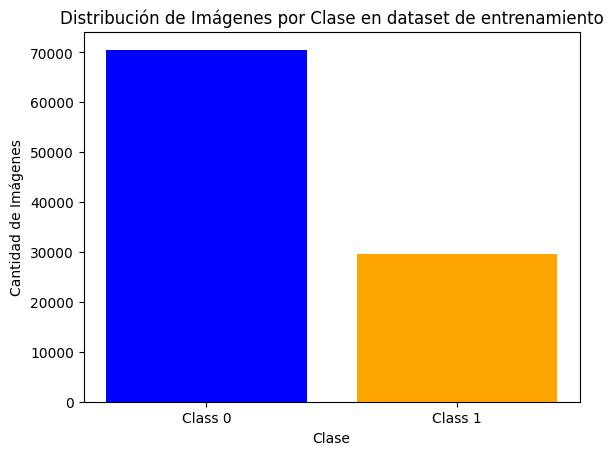

class 0:  70525
class 1:  29662


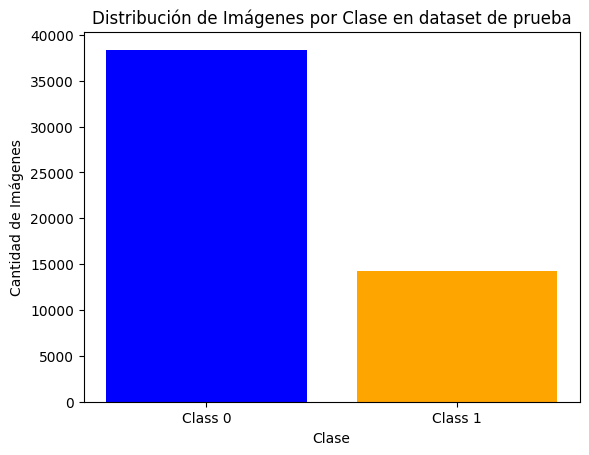

class 0:  38373
class 1:  14243


In [9]:
import os
import matplotlib.pyplot as plt

train_folder = 'dataset_train'
test_folder = 'dataset_test'

class_0_count_train = 0
class_1_count_train = 0

class_0_count_test = 0
class_1_count_test = 0

for folder in os.listdir(train_folder):
    folder_path = os.path.join(train_folder, folder)
    
    if os.path.isdir(folder_path):
        class_0_folder = os.path.join(folder_path, '0')
        if os.path.isdir(class_0_folder):
            class_0_count_train += len([f for f in os.listdir(class_0_folder) if os.path.isfile(os.path.join(class_0_folder, f))])
        
        class_1_folder = os.path.join(folder_path, '1')
        if os.path.isdir(class_1_folder):
            class_1_count_train += len([f for f in os.listdir(class_1_folder) if os.path.isfile(os.path.join(class_1_folder, f))])

for folder in os.listdir(test_folder):
    folder_path = os.path.join(test_folder, folder)
    
    if os.path.isdir(folder_path):
        class_0_folder = os.path.join(folder_path, '0')
        if os.path.isdir(class_0_folder):
            class_0_count_test += len([f for f in os.listdir(class_0_folder) if os.path.isfile(os.path.join(class_0_folder, f))])
        
        class_1_folder = os.path.join(folder_path, '1')
        if os.path.isdir(class_1_folder):
            class_1_count_test += len([f for f in os.listdir(class_1_folder) if os.path.isfile(os.path.join(class_1_folder, f))])


labels = ['Class 0', 'Class 1']
counts = [class_0_count_train, class_1_count_train]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Distribución de Imágenes por Clase en dataset de entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Imágenes')
plt.show()
print("class 0: ", class_0_count_train)
print("class 1: ", class_1_count_train)

counts = [class_0_count_test, class_1_count_test]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Distribución de Imágenes por Clase en dataset de prueba')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Imágenes')
plt.show()
print("class 0: ", class_0_count_test)
print("class 1: ", class_1_count_test)

Procederemos a balancear la carpeta de entrenamiento

In [10]:
import os
from PIL import Image, ImageEnhance
import random

folder_path = 'dataset_train'

def transform_image(img):
    # Rotacion
    if random.random() > 0.5:
        rotation_angle = random.choice([90, 180, 270])
        img = img.rotate(rotation_angle, resample=Image.BICUBIC, expand=False)

    # Zoom con recorte
    if random.random() > 0.5:
        zoom_factor = random.uniform(1.0, 1.1)
        img = img.resize((int(img.width * zoom_factor), int(img.height * zoom_factor)), resample=Image.BICUBIC)

        left = (img.width - 50) // 2
        top = (img.height - 50) // 2
        img = img.crop((left, top, left + 50, top + 50))

    # Efecto espejo opcional
    if random.random() > 0.5: 
        img = img.transpose(Image.FLIP_LEFT_RIGHT)

    if random.random() > 0.5: 
        img = img.transpose(Image.FLIP_TOP_BOTTOM)

    if random.random() > 0.5:     
        enhancer_brightness = ImageEnhance.Brightness(img)
        brightness_factor = random.uniform(0.9, 1.1) 
        img = enhancer_brightness.enhance(brightness_factor)

    if random.random() > 0.5:
        enhancer_contrast = ImageEnhance.Contrast(img)
        contrast_factor = random.uniform(0.9, 1.1) 
        img = enhancer_contrast.enhance(contrast_factor)

    return img

for filename in os.listdir(folder_path):
    subfolder = os.path.join(folder_path, filename)
    if os.path.isdir(subfolder):
        class_path_0 = os.path.join(subfolder, '0')
        class_path_1 = os.path.join(subfolder, '1')
        
        count_0 = len(os.listdir(class_path_0))
        count_1 = len(os.listdir(class_path_1))

        if count_0 > count_1:
            menor_class_path, mayor_class_path = class_path_1, class_path_0
            diferencia = count_0 - count_1
        else:
            menor_class_path, mayor_class_path = class_path_0, class_path_1
            diferencia = count_1 - count_0

        if diferencia > 0:
            print(f"Duplicando {diferencia} imágenes en la carpeta: {menor_class_path}")
            images_to_duplicate = os.listdir(menor_class_path)[:diferencia]

            for i in range(diferencia):
                image_path = os.path.join(menor_class_path, images_to_duplicate[i % len(images_to_duplicate)])
                with Image.open(image_path) as img:
                    img = transform_image(img)
                    base_name, ext = os.path.splitext(image_path)
                    new_file_name = f"{base_name}_transformed_{i}{ext}"
                    img.save(new_file_name)

Duplicando 90 imágenes en la carpeta: dataset_train\10255\1
Duplicando 234 imágenes en la carpeta: dataset_train\10256\1
Duplicando 1403 imágenes en la carpeta: dataset_train\10259\1
Duplicando 567 imágenes en la carpeta: dataset_train\10260\1
Duplicando 643 imágenes en la carpeta: dataset_train\10269\1
Duplicando 2125 imágenes en la carpeta: dataset_train\10272\1
Duplicando 424 imágenes en la carpeta: dataset_train\10273\0
Duplicando 463 imágenes en la carpeta: dataset_train\10275\0
Duplicando 974 imágenes en la carpeta: dataset_train\10278\1
Duplicando 837 imágenes en la carpeta: dataset_train\10279\1
Duplicando 296 imágenes en la carpeta: dataset_train\10286\1
Duplicando 2184 imágenes en la carpeta: dataset_train\10288\1
Duplicando 786 imágenes en la carpeta: dataset_train\10291\1
Duplicando 511 imágenes en la carpeta: dataset_train\10292\1
Duplicando 428 imágenes en la carpeta: dataset_train\10293\1
Duplicando 592 imágenes en la carpeta: dataset_train\10299\0
Duplicando 1434 imágen

Una vez terminado el balanceo de datos terminamos con esta distribucion de datos

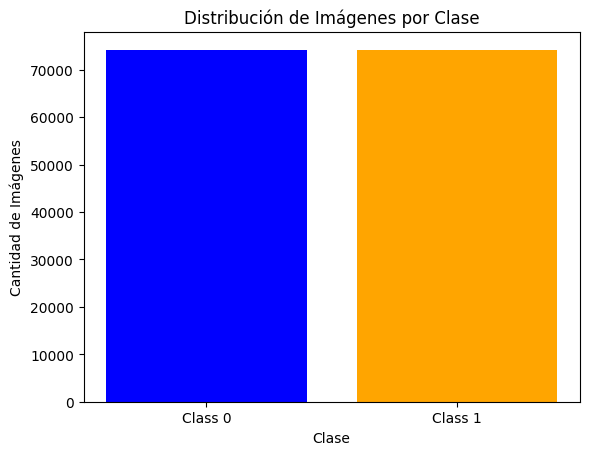

class 0:  74230
class 1:  74230


In [11]:
import os
import matplotlib.pyplot as plt

main_folder = 'dataset_train'

class_0_count = 0
class_1_count = 0

for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    
    if os.path.isdir(folder_path):
        class_0_folder = os.path.join(folder_path, '0')
        if os.path.isdir(class_0_folder):
            class_0_count += len([f for f in os.listdir(class_0_folder) if os.path.isfile(os.path.join(class_0_folder, f))])
        
        class_1_folder = os.path.join(folder_path, '1')
        if os.path.isdir(class_1_folder):
            class_1_count += len([f for f in os.listdir(class_1_folder) if os.path.isfile(os.path.join(class_1_folder, f))])

labels = ['Class 0', 'Class 1']
counts = [class_0_count, class_1_count]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Distribución de Imágenes por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Imágenes')
plt.show()
print("class 0: ", class_0_count)
print("class 1: ", class_1_count)

Ahora miraremos cual de las arquitecturas entre Mobilenet y Resnet tiene mejor rendimiento

In [7]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def get_mobile():
    model_mobilenet = models.mobilenet_v2(pretrained=True)

    model_mobilenet.classifier[1] = nn.Linear(model_mobilenet.classifier[1].in_features, 2)
    
    model_mobilenet = model_mobilenet.to(device)
    return model_mobilenet
print(get_mobile())
print(device)

c:\Users\mayko\anaconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mayko\anaconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [6]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def get_model():
    model = models.resnet18(pretrained=True)
    features = model.fc.in_features
    model.fc = nn.Linear(features, 1)
    model = model.to(device)
    return model

print(get_model())
print(device)

c:\Users\mayko\anaconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mayko\anaconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Entrenamiento de ResNet

In [4]:
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
import torch
import numpy as np
from sklearn.model_selection import KFold

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [] 
        self.labels = [] 

        for class_folder in os.listdir(root_dir):
            class_folder_path = os.path.join(root_dir, class_folder)
            
            if os.path.isdir(class_folder_path):
                for label in [0, 1]:
                    label_folder_path = os.path.join(class_folder_path, str(label))

                    if os.path.isdir(label_folder_path):
                        for img_name in os.listdir(label_folder_path):
                            img_path = os.path.join(label_folder_path, img_name)                          
                            self.image_paths.append(img_path)
                            self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):

        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]

        return image, label
    

class EarlyStopping:
    def __init__(self, patience=7, delta=0.0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset_path = 'dataset_train'
dataset = CustomDataset(root_dir=dataset_path, transform=transform)

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
validation_resnet = []

for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset)):
    print(f'Fold {fold + 1}')
    train_subset = Subset(dataset, train_ids)
    val_subset = Subset(dataset, val_ids)
    model_resnet = get_model()
    train_loader = DataLoader(train_subset, batch_size=1500, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=1500, shuffle=False)
    optimizer = torch.optim.Adam(model_resnet.parameters(), lr=0.001)
    criterion = nn.BCEWithLogitsLoss()
    early_stopping = EarlyStopping(patience=5, delta=0.001)

    model_resnet.train()
    for epoch in range(10):
        print(f'Epoch {epoch + 1}')
        print("---------------------------------------------")
        train_loss = 0.0
        train_correct = 0
        total_train_samples = 0
        for batch, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)
            optimizer.zero_grad()
            outputs = model_resnet(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            train_correct += (predicted == labels).sum().item()
            total_train_samples += labels.size(0)

            batch_accuracy = (predicted == labels).float().mean().item()

            if (batch + 1) % 10 == 0 or batch == len(train_loader) - 1:
                print(f"Epoch [{epoch+1}/{10}], Batch [{batch+1}/{len(train_loader)}], "
                    f"Loss: {loss.item():.4f}, Accuracy: {batch_accuracy:.4f}")
                
        avg_train_loss = train_loss / total_train_samples
        train_accuracy = train_correct / total_train_samples

        if epoch + 1 < 10:
            model_resnet.eval()
            val_loss = 0.0
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device)
                    labels = labels.float().unsqueeze(1)
                    outputs = model_resnet(images)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item() * images.size(0)

            avg_val_loss = val_loss / len(val_loader.dataset)
            early_stopping(avg_val_loss)
            if early_stopping.early_stop:
                print("Early stopping")
                break
            model_resnet.train()
        

    print("Evaluando...")
    model_resnet.eval()
    val_loss = 0.0
    val_correct = 0
    total_val_samples = 0
    with torch.no_grad():
        for batch, (images, labels) in enumerate(val_loader):
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model_resnet(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            val_correct += (predicted == labels).sum().item()
            total_val_samples += labels.size(0)

            batch_accuracy = (predicted == labels).float().mean().item()

    avg_val_loss = val_loss / total_val_samples
    val_accuracy = val_correct / total_val_samples
    validation_resnet.append(val_accuracy)
    print(f"Epoch [{epoch+1}/{10}] "
        f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
        f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}\n")

avg_accuracy = np.mean(validation_resnet)
std_accuracy = np.std(validation_resnet)

print(f'Accuracy promedio: {avg_accuracy:.2f} +/- {std_accuracy:.2f}')

Fold 1


c:\Users\mayko\anaconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mayko\anaconda3\envs\torch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1
---------------------------------------------
Epoch [1/10], Batch [10/66], Loss: 0.4127, Accuracy: 0.8207
Epoch [1/10], Batch [20/66], Loss: 0.3809, Accuracy: 0.8340
Epoch [1/10], Batch [30/66], Loss: 0.3417, Accuracy: 0.8513
Epoch [1/10], Batch [40/66], Loss: 0.3448, Accuracy: 0.8513
Epoch [1/10], Batch [50/66], Loss: 0.2874, Accuracy: 0.8800
Epoch [1/10], Batch [60/66], Loss: 0.3381, Accuracy: 0.8560
Epoch [1/10], Batch [66/66], Loss: 0.2952, Accuracy: 0.8717
Epoch 2
---------------------------------------------
Epoch [2/10], Batch [10/66], Loss: 0.2415, Accuracy: 0.9040
Epoch [2/10], Batch [20/66], Loss: 0.2693, Accuracy: 0.8913
Epoch [2/10], Batch [30/66], Loss: 0.2903, Accuracy: 0.8813
Epoch [2/10], Batch [40/66], Loss: 0.2482, Accuracy: 0.8987
Epoch [2/10], Batch [50/66], Loss: 0.2436, Accuracy: 0.9007
Epoch [2/10], Batch [60/66], Loss: 0.2601, Accuracy: 0.8980
Epoch [2/10], Batch [66/66], Loss: 0.2496, Accuracy: 0.8907
Epoch 3
--------------------------------------------

In [6]:
print(f'Accuracy promedio: {avg_accuracy:.4f} +/- {std_accuracy:.4f}')

Accuracy promedio: 0.8770 +/- 0.0047


Entrenamiento de mobileNet

In [14]:
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
import torch
import numpy as np
from sklearn.model_selection import KFold

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [] 
        self.labels = [] 

        for class_folder in os.listdir(root_dir):
            class_folder_path = os.path.join(root_dir, class_folder)
            
            if os.path.isdir(class_folder_path):
                for label in [0, 1]:
                    label_folder_path = os.path.join(class_folder_path, str(label))

                    if os.path.isdir(label_folder_path):
                        for img_name in os.listdir(label_folder_path):
                            img_path = os.path.join(label_folder_path, img_name)                          
                            self.image_paths.append(img_path)
                            self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):

        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]

        return image, label
    

class EarlyStopping:
    def __init__(self, patience=7, delta=0.0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset_path = 'dataset_train'
dataset = CustomDataset(root_dir=dataset_path, transform=transform)

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
validation_resnet = []


validation_mobilenet = []

for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset)):
    print(f'Fold {fold + 1}')
    train_subset = Subset(dataset, train_ids)
    val_subset = Subset(dataset, val_ids)
    model_mobile = get_mobile()
    train_loader = DataLoader(train_subset, batch_size=1500, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=1500, shuffle=False)
    optimizer = torch.optim.Adam(model_mobile.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    early_stopping = EarlyStopping(patience=5, delta=0.001)

    model_mobile.train()
    for epoch in range(10):
        print(f'Epoch {epoch + 1}')
        print("---------------------------------------------")
        train_loss = 0.0
        train_correct = 0
        total_train_samples = 0
        train_size = len(train_loader.dataset)
        nlotes = len(train_loader)
        loss_train = 0.0
        accuracy = 0.0
        for batch, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            #labels = labels.float().unsqueeze(1)
            optimizer.zero_grad()
            outputs = model_mobile(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_samples += labels.size(0)

            loss_train += loss.item()
            accuracy += (outputs.argmax(1) == labels).type(torch.float).sum().item()

            if (batch + 1) % 10 == 0 or batch == len(train_loader) - 1:
                print(f"Epoch [{epoch+1}/{10}], Batch [{batch+1}/{len(train_loader)}], "
                    f"Loss: {loss.item():.4f}")
        
        exactitud = accuracy / train_size
        perdida_train = loss_train / nlotes

        print(f'\tExactitud/pérdida promedio:')
        print(f'\t\tEntrenamiento: {(100*exactitud):>0.1f}% / {perdida_train:>8f}') 

        avg_train_loss = loss_train / total_train_samples
        train_accuracy = accuracy / total_train_samples
        
        if epoch + 1 < 10:
            model_mobile.eval()
            val_loss = 0.0
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device)
                    #labels = labels.float().unsqueeze(1)
                    outputs = model_mobile(images)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item() 

            avg_val_loss = val_loss / len(val_loader.dataset)
            early_stopping(avg_val_loss)

            if early_stopping.early_stop:
                print("Early stopping")
                break
            model_mobile.train()

    print("Evaluando...")
    model_mobile.eval()
    val_loss = 0.0
    val_correct = 0
    total_val_samples = 0
    with torch.no_grad():
        for batch, (images, labels) in enumerate(val_loader):
            images, labels = images.to(device), labels.to(device)
            #labels = labels.float().unsqueeze(1)

            outputs = model_mobile(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            #predicted = (torch.sigmoid(outputs) > 0.5).float()
            val_correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()
            total_val_samples += labels.size(0)


    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / len(val_loader.dataset)
    validation_mobilenet.append(val_accuracy)
    print(f"Epoch [{epoch+1}/{10}] "
        f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
        f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}\n")

avg_accuracy = np.mean(validation_mobilenet)
std_accuracy = np.std(validation_mobilenet)

print(f'Accuracy promedio: {avg_accuracy:.2f} +/- {std_accuracy:.2f}')

Fold 1
Epoch 1
---------------------------------------------
Epoch [1/10], Batch [10/66], Loss: 0.4335
Epoch [1/10], Batch [20/66], Loss: 0.3395
Epoch [1/10], Batch [30/66], Loss: 0.3329
Epoch [1/10], Batch [40/66], Loss: 0.3603
Epoch [1/10], Batch [50/66], Loss: 0.3044
Epoch [1/10], Batch [60/66], Loss: 0.2900
Epoch [1/10], Batch [66/66], Loss: 0.2853
	Exactitud/pérdida promedio:
		Entrenamiento: 84.4% / 0.361965
Epoch 2
---------------------------------------------
Epoch [2/10], Batch [10/66], Loss: 0.2763
Epoch [2/10], Batch [20/66], Loss: 0.2276
Epoch [2/10], Batch [30/66], Loss: 0.2436
Epoch [2/10], Batch [40/66], Loss: 0.2525
Epoch [2/10], Batch [50/66], Loss: 0.2562
Epoch [2/10], Batch [60/66], Loss: 0.2890
Epoch [2/10], Batch [66/66], Loss: 0.2572
	Exactitud/pérdida promedio:
		Entrenamiento: 89.1% / 0.260739
Epoch 3
---------------------------------------------
Epoch [3/10], Batch [10/66], Loss: 0.1830
Epoch [3/10], Batch [20/66], Loss: 0.2270
Epoch [3/10], Batch [30/66], Loss

In [15]:
print(f'Accuracy promedio: {avg_accuracy:.4f} +/- {std_accuracy:.4f}')

Accuracy promedio: 0.8930 +/- 0.0038


In [18]:
import pandas as pd

headers = ['Modelo', 'Resultados']
values = [
    ['ResNet18', "0.8770 +/- 0.0047"],
    ['MobileNetV2', "0.8930 +/- 0.0038"]
]

df = pd.DataFrame(values, columns=headers)
df

,Modelo,Resultados
0,ResNet18,0.8770 +/- 0.0047
1,MobileNetV2,0.8930 +/- 0.0038


Con estos datos, utilizaremos MobileNetV2 para solucion del problema

In [10]:
import os
from PIL import Image, ImageEnhance
import random

folder_path = 'dataset_test'

def transform_image(img):
    # Rotacion
    if random.random() > 0.5:
        rotation_angle = random.choice([90, 180, 270])
        img = img.rotate(rotation_angle, resample=Image.BICUBIC, expand=False)

    # Zoom con recorte
    if random.random() > 0.5:
        zoom_factor = random.uniform(1.0, 1.1)
        img = img.resize((int(img.width * zoom_factor), int(img.height * zoom_factor)), resample=Image.BICUBIC)

        left = (img.width - 50) // 2
        top = (img.height - 50) // 2
        img = img.crop((left, top, left + 50, top + 50))

    # Efecto espejo opcional
    if random.random() > 0.5: 
        img = img.transpose(Image.FLIP_LEFT_RIGHT)

    if random.random() > 0.5: 
        img = img.transpose(Image.FLIP_TOP_BOTTOM)

    if random.random() > 0.5:     
        enhancer_brightness = ImageEnhance.Brightness(img)
        brightness_factor = random.uniform(0.9, 1.1) 
        img = enhancer_brightness.enhance(brightness_factor)

    if random.random() > 0.5:
        enhancer_contrast = ImageEnhance.Contrast(img)
        contrast_factor = random.uniform(0.9, 1.1) 
        img = enhancer_contrast.enhance(contrast_factor)

    return img

for filename in os.listdir(folder_path):
    subfolder = os.path.join(folder_path, filename)
    if os.path.isdir(subfolder):
        class_path_0 = os.path.join(subfolder, '0')
        class_path_1 = os.path.join(subfolder, '1')
        
        count_0 = len(os.listdir(class_path_0))
        count_1 = len(os.listdir(class_path_1))

        if count_0 > count_1:
            menor_class_path, mayor_class_path = class_path_1, class_path_0
            diferencia = count_0 - count_1
        else:
            menor_class_path, mayor_class_path = class_path_0, class_path_1
            diferencia = count_1 - count_0

        if diferencia > 0:
            print(f"Duplicando {diferencia} imágenes en la carpeta: {menor_class_path}")
            images_to_duplicate = os.listdir(menor_class_path)[:diferencia]

            for i in range(diferencia):
                image_path = os.path.join(menor_class_path, images_to_duplicate[i % len(images_to_duplicate)])
                with Image.open(image_path) as img:
                    img = transform_image(img)
                    base_name, ext = os.path.splitext(image_path)
                    new_file_name = f"{base_name}_transformed_{i}{ext}"
                    img.save(new_file_name)

Duplicando 314 imágenes en la carpeta: dataset_test\10258\1
Duplicando 1751 imágenes en la carpeta: dataset_test\10290\1
Duplicando 732 imágenes en la carpeta: dataset_test\10301\1
Duplicando 715 imágenes en la carpeta: dataset_test\10302\0
Duplicando 1779 imágenes en la carpeta: dataset_test\10305\1
Duplicando 619 imágenes en la carpeta: dataset_test\12749\1
Duplicando 639 imágenes en la carpeta: dataset_test\12810\1
Duplicando 747 imágenes en la carpeta: dataset_test\12821\1
Duplicando 781 imágenes en la carpeta: dataset_test\12826\1
Duplicando 276 imágenes en la carpeta: dataset_test\12867\1
Duplicando 197 imágenes en la carpeta: dataset_test\12877\1
Duplicando 1025 imágenes en la carpeta: dataset_test\12878\1
Duplicando 1155 imágenes en la carpeta: dataset_test\12890\1
Duplicando 840 imágenes en la carpeta: dataset_test\12911\1
Duplicando 104 imágenes en la carpeta: dataset_test\12932\1
Duplicando 286 imágenes en la carpeta: dataset_test\13020\1
Duplicando 981 imágenes en la carpet

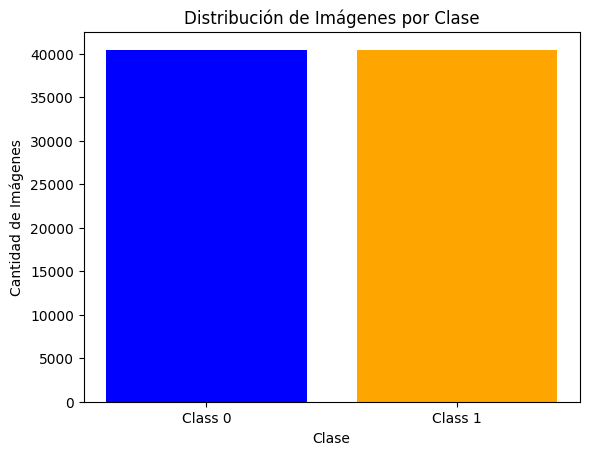

class 0:  40448
class 1:  40448


In [11]:
import os
import matplotlib.pyplot as plt

main_folder = 'dataset_test'

class_0_count = 0
class_1_count = 0

for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    
    if os.path.isdir(folder_path):
        class_0_folder = os.path.join(folder_path, '0')
        if os.path.isdir(class_0_folder):
            class_0_count += len([f for f in os.listdir(class_0_folder) if os.path.isfile(os.path.join(class_0_folder, f))])
        
        class_1_folder = os.path.join(folder_path, '1')
        if os.path.isdir(class_1_folder):
            class_1_count += len([f for f in os.listdir(class_1_folder) if os.path.isfile(os.path.join(class_1_folder, f))])

labels = ['Class 0', 'Class 1']
counts = [class_0_count, class_1_count]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Distribución de Imágenes por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Imágenes')
plt.show()
print("class 0: ", class_0_count)
print("class 1: ", class_1_count)

In [7]:
import torch.nn as nn
import torch
from torchvision import models

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def get_mobile():
    model_mobilenet = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

    model_mobilenet.classifier[0] = nn.Dropout(p=0.3, inplace=True)
    model_mobilenet.classifier[1] = nn.Linear(model_mobilenet.classifier[1].in_features, 2)
    
    model_mobilenet = model_mobilenet.to(device)
    return model_mobilenet

print(device)
print(get_mobile())


cuda
MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96,

Epoch 1
---------------------------------------------
Epoch [1/10], Batch [1000/2320], Loss: 0.3601
Epoch [1/10], Batch [2000/2320], Loss: 0.2468
Epoch [1/10], Batch [2320/2320], Loss: 0.4426
	Exactitud/pérdida promedio:
		Entrenamiento: 86.6% / 0.321292
	Exactitud/pérdida promedio:
		Validación: 87.6% / 0.303393
Epoch 2
---------------------------------------------
Epoch [2/10], Batch [1000/2320], Loss: 0.2149
Epoch [2/10], Batch [2000/2320], Loss: 0.1812
Epoch [2/10], Batch [2320/2320], Loss: 0.3218
	Exactitud/pérdida promedio:
		Entrenamiento: 89.5% / 0.259706
	Exactitud/pérdida promedio:
		Validación: 86.5% / 0.311815
Epoch 3
---------------------------------------------
Epoch [3/10], Batch [1000/2320], Loss: 0.1885
Epoch [3/10], Batch [2000/2320], Loss: 0.1812
Epoch [3/10], Batch [2320/2320], Loss: 0.2491
	Exactitud/pérdida promedio:
		Entrenamiento: 90.6% / 0.234442
	Exactitud/pérdida promedio:
		Validación: 86.5% / 0.311838
Epoch 4
---------------------------------------------
E

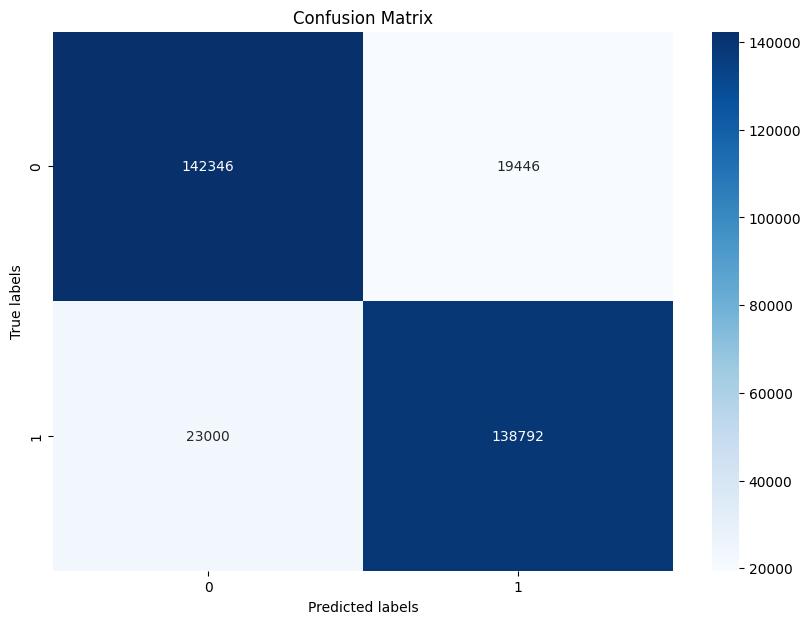

In [12]:
import os
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [] 
        self.labels = [] 

        for class_folder in os.listdir(root_dir):
            class_folder_path = os.path.join(root_dir, class_folder)
            
            if os.path.isdir(class_folder_path):
                for label in [0, 1]:
                    label_folder_path = os.path.join(class_folder_path, str(label))

                    if os.path.isdir(label_folder_path):
                        for img_name in os.listdir(label_folder_path):
                            img_path = os.path.join(label_folder_path, img_name)                          
                            self.image_paths.append(img_path)
                            self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):

        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]

        return image, label
    

class EarlyStopping:
    def __init__(self, patience=7, delta=0.0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.early_stop = False

    def __call__(self, train_loss, val_loss):
        if (val_loss - train_loss) > self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True


transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset_path = 'dataset_train'
val_path = 'dataset_test'
dataset = CustomDataset(root_dir=dataset_path, transform=transform)
dataset_test = CustomDataset(root_dir=val_path, transform=transform)
model = get_mobile()

train_loader = DataLoader(dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
early_stopping = EarlyStopping(patience=3, delta=0.001)

all_labels = []
all_predictions = []

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}')
    print("---------------------------------------------")
    train_size = len(train_loader.dataset)
    batch_size = len(train_loader)

    model.train()

    loss_train, accuracy = 0.0, 0.0

    for batch, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_train += loss.item()
        accuracy += (outputs.argmax(1) == labels).type(torch.float).sum().item()

        if (batch + 1) % 1000 == 0 or batch == len(train_loader) - 1:
            print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch+1}/{batch_size}], "
                f"Loss: {loss:.4f}")
            
    loss_train /= batch_size
    accuracy /= train_size

    print(f'\tExactitud/pérdida promedio:')
    print(f'\t\tEntrenamiento: {(100*accuracy):>0.1f}% / {loss_train:>8f}')

    model.eval()
    val_size = len(val_loader.dataset)
    batch_size = len(val_loader)

    loss_val, accuracy = 0.0, 0.0

    with torch.no_grad():
        for batch, (images, labels) in enumerate(val_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            loss_val += loss.item()
            accuracy += (outputs.argmax(1) == labels).type(torch.float).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(outputs.argmax(1).cpu().numpy())

    accuracy_final = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)
    confusion = confusion_matrix(all_labels, all_predictions)

    loss_val /= batch_size
    accuracy /= val_size
    print(f'\tExactitud/pérdida promedio:')
    print(f'\t\tValidación: {(100*accuracy):>0.1f}% / {loss_val:>8f}')
    early_stopping(loss_train, loss_val)
    if early_stopping.early_stop:
        print("Early stopping")
        break

print(f'Accuracy: {accuracy_final:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1: {f1:.4f}')
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
torch.save(model, 'model_mobile.pth')

Mostraremos 5 clasificaiones correctas y 5 incorrectas

In [3]:
model = torch.load('app-web/model_mobile.pth')

C:\Users\mayko\AppData\Local\Temp\ipykernel_20972\417272078.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('app-web/model_mobile.pth')


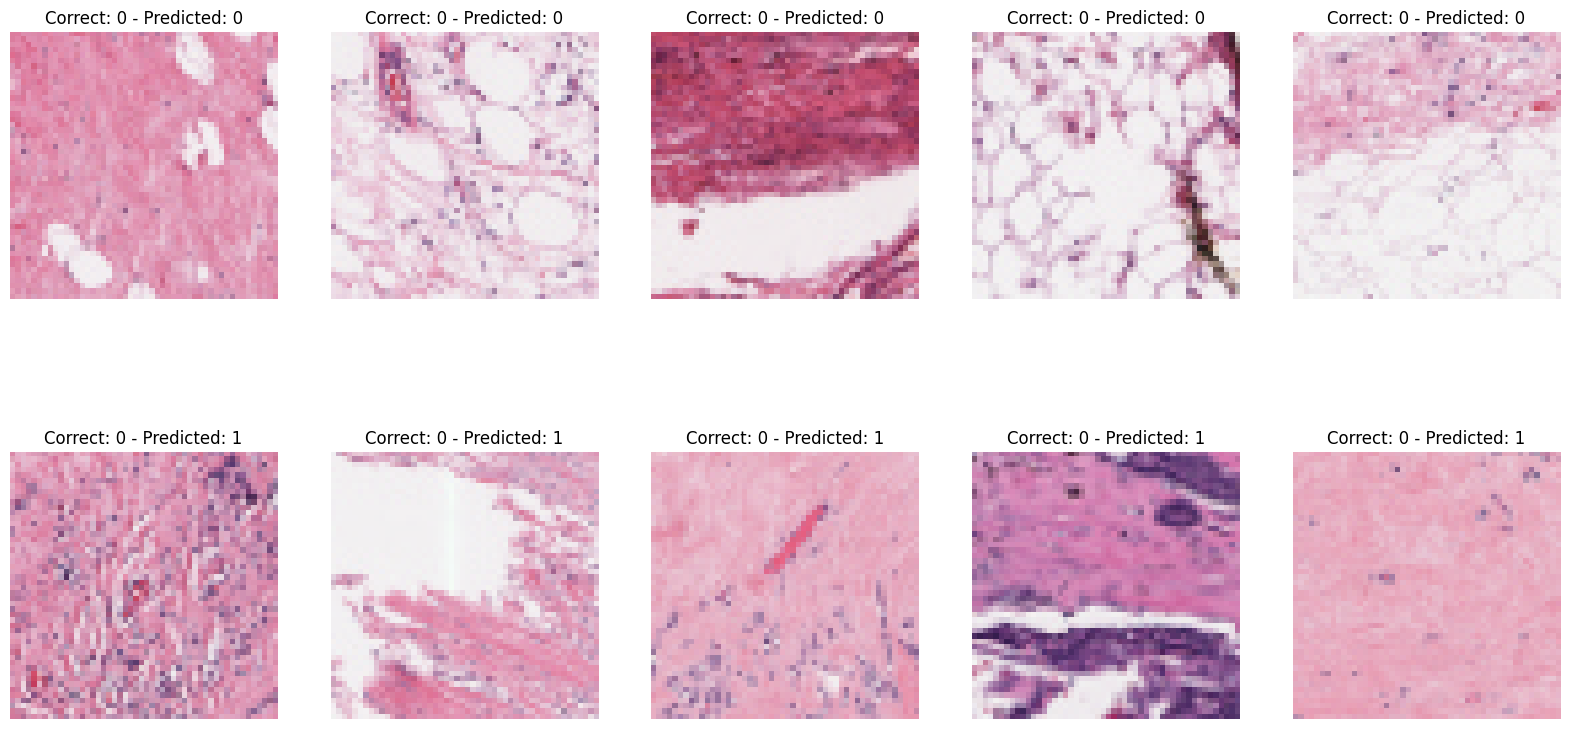

In [34]:
import torch
from torchvision import transforms
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt
import numpy as np


class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [] 
        self.labels = [] 

        for class_folder in os.listdir(root_dir):
            class_folder_path = os.path.join(root_dir, class_folder)
            
            if os.path.isdir(class_folder_path):
                for label in [0, 1]:
                    label_folder_path = os.path.join(class_folder_path, str(label))

                    if os.path.isdir(label_folder_path):
                        for img_name in os.listdir(label_folder_path):
                            img_path = os.path.join(label_folder_path, img_name)                          
                            self.image_paths.append(img_path)
                            self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):

        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]

        return image, label

transform = transforms.Compose([
    transforms.ToTensor(),
])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
val_path = 'dataset_test'
dataset_test = CustomDataset(root_dir=val_path, transform=transform)
val_loader = DataLoader(dataset_test, batch_size=64, shuffle=True)

correct_class_0 = []
correct_class_1 = []

incorrect_class_0 = []
incorrect_class_1 = []

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images) 
        predicted = outputs.argmax(1)
        
        for img in range(len(images)):
            if labels[img].item() == 0:
                if labels[img].item() == predicted[img].item() and len(correct_class_0) < 5:
                    correct_class_0.append((images[img], labels[img].item(), predicted[img].item()))
                elif labels[img].item() != predicted[img].item() and len(incorrect_class_0) < 5:
                    incorrect_class_0.append((images[img], labels[img].item(), predicted[img].item()))
            elif labels[img].item() == 1:
                if labels[img].item() == predicted[img].item() and len(correct_class_1) < 5:
                    correct_class_1.append((images[img], labels[img].item(), predicted[img].item()))
                elif labels[img].item() != predicted[img].item() and len(incorrect_class_1) < 5:
                    incorrect_class_1.append((images[img], labels[img].item(), predicted[img].item()))

        if len(correct_class_0) == 5 and len(incorrect_class_0) == 5 and len(correct_class_1) == 5 and len(incorrect_class_1) == 5:
                break

def imshow(img):
    img = img / 2 + 0.5 
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(len(correct_class_0)):
    axes[0, i].imshow(correct_class_0[i][0].cpu().numpy().transpose((1, 2, 0))) 
    axes[0, i].set_title(f'Correct: {correct_class_0[i][1]} - Predicted: {correct_class_0[i][2]}')
    axes[0, i].axis('off')

for i in range(len(incorrect_class_0)):
    axes[1, i].imshow(incorrect_class_0[i][0].cpu().numpy().transpose((1, 2, 0))) 
    axes[1, i].set_title(f'Correct: {incorrect_class_0[i][1]} - Predicted: {incorrect_class_0[i][2]}')
    axes[1, i].axis('off')

plt.show()

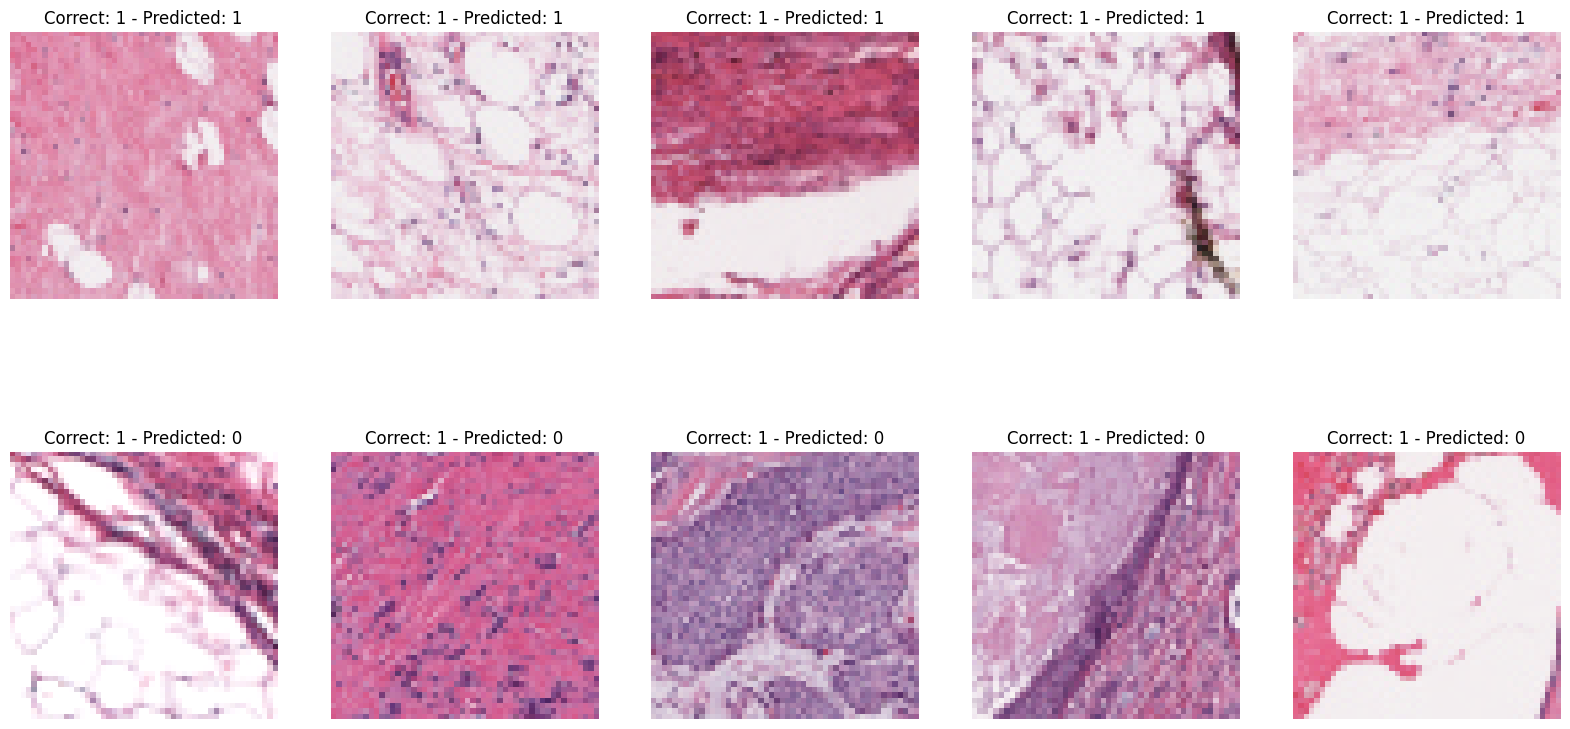

In [35]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(len(correct_class_1)):
    axes[0, i].imshow(correct_class_0[i][0].cpu().numpy().transpose((1, 2, 0))) 
    axes[0, i].set_title(f'Correct: {correct_class_1[i][1]} - Predicted: {correct_class_1[i][2]}')
    axes[0, i].axis('off')

for i in range(len(incorrect_class_1)):
    axes[1, i].imshow(incorrect_class_1[i][0].cpu().numpy().transpose((1, 2, 0))) 
    axes[1, i].set_title(f'Correct: {incorrect_class_1[i][1]} - Predicted: {incorrect_class_1[i][2]}')
    axes[1, i].axis('off')

plt.show()

Los resultados obtenidos muestran que el modelo logra identificar correctamente un buen número de imágenes de ambas clases, pero presenta problemas con falsos positivos y falsos negativos, lo que indica dificultades para distinguir ciertas características específicas de cada clase. En la clase 0, los falsos positivos sugieren que algunas imágenes comparten similitudes visuales con la clase 1, mientras que en la clase 1 los falsos negativos evidencian que ciertas características distintivas no están siendo suficientemente captadas por el modelo. Esto puede deberse a factores como un conjunto de datos de entrenamiento insuficientemente representativo o una arquitectura del modelo que no se ajusta de manera óptima a la complejidad del problema. El modelo podria comportarse mejor si se ajustan estos aspectos, como incrementar la variabilidad del conjunto de datos y analizar las características aprendidas por el modelo para mejorar su capacidad de generalización.